# Exercise 2 - Image Classification with ML and DL

In this exercise you and your team have to finish the implementation of the following machine learning code.  

This exercise consists of the following steps which have to work in conjunction:
* Data visualization - Visualize the data to become familiar with it and identify possible patterns and problems
* Data preparation - Prepare the data for it to be usable later in the machine learning model
* Model creation - Chose/build a machine learning model suitable for the given task
* Model training - Train your model with the data you prepared
* Model evaluation - Evaluate the performance of your model. For this choose appropriate measurement metrics and visualize it with the help of graphs and figures

---

**You will find tasks all throughout this notebook. The start and the end of a task is marked through parting lines as in between these lines you can add as many code cells as you need to finish the task and to add your documentation.**

---

## Part 1 - Classical Machine Learning Algorithms

### Important imports

In [332]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import pathlib

### Inspect the data 

The first step of every machine learning project is to make oneself familiar with the data.  

* In what form is the data accessible?
* How many samples are there?
* Are they already sorted by class?
* etc.

It is important to look through them programmatically and manually to see if maybe some prior preparation is needed before even loading the data.

You can use the following code to check, if your dataset is in the right place (data/CIFAR-10-images/)

In [333]:
# Get information about the folder contents
for dirpath, dirnames, filenames in os.walk("data/CIFAR-10-images/"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'data/CIFAR-10-images/'.
There are 10 directories and 0 images in 'data/CIFAR-10-images/test'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test\airplane'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test\automobile'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test\bird'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test\cat'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test\deer'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test\dog'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test\frog'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test\horse'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test\ship'.
There are 0 directories and 1000 images in 'data/CIFAR-10-images/test\truck'.
There are 10 directories and 0 images in 'data/CIFAR-10-images/train'.
There are 0 di

**Since each sample is already sorted into its own dictionary we don't have to do it ourselves and can take the folder names as names for our classes we want our model to be able to classify**

---

#### Task 01 - Generate Class Names

##### Use the Numpy *np.array()* to create a list of class names from the subdirectories!

Take a look here if you're stuck: https://numpy.org/doc/stable/

The output should look something like this:

`['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck'] 10`


In [334]:
# get class names from folders
data_dir = pathlib.Path("data/CIFAR-10-images/train/")  # turn our training path into a Python path

#class_names =  # TODO: create a list of class_names from the subdirectories
class_names = np.array([f for f in os.listdir(data_dir) if not f.startswith('.')])

print(class_names, len(class_names))

['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck'] 10


#### Next, you need to associate class names with numbers.

The output should look something like this:
`(10,
 {'airplane': 0,
  'automobile': 1,
  'bird': 2,
  'cat': 3,
  'deer': 4,
  'dog': 5,
  'frog': 6,
  'horse': 7,
  'ship': 8,
  'truck': 9})`

In [335]:
# associate class names with numbers, machinelaerning and deeplearning works with numbers!
#class_names_dict =  # TODO: create the dictionary
class_names_dict = dict(enumerate(class_names.flatten(), 0))
len(class_names_dict), class_names_dict



(10,
 {0: 'airplane',
  1: 'automobile',
  2: 'bird',
  3: 'cat',
  4: 'deer',
  5: 'dog',
  6: 'frog',
  7: 'horse',
  8: 'ship',
  9: 'truck'})

---

### Visualizing

After getting a feeling about the size and structure of our data on our hard drive, the next step is to visualize the data.  
In the case of image data this can be done by loading random images and plotting them. Also, just looking through them in their folders is a good idea.

In [336]:
import random
import matplotlib.image as mpimg


def display_random_img(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + "/" + random_image[0])

    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Image shape: {img.shape}")

    return img

**By running the code cell below we can look through random images and might be able to see out-liners or maybe even wrongly labeled images**

---

#### Task 02 - Displaying an image

##### Use the *display_random_img(target_dir, target_class)* function to display a random image with the corresponding label.

If done right, you should see the image below your function call.

Image shape: (32, 32, 3)


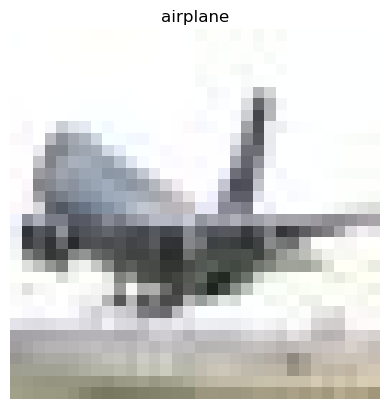

In [337]:
# Display a random image
testpath = 'data/CIFAR-10-images/test/'
trainingpath = 'data/CIFAR-10-images/test/'

img =  display_random_img(testpath, 'airplane')# TODO: Call display_random_img(target_dir, target_class) right here

Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)
Image shape: (32, 32, 3)


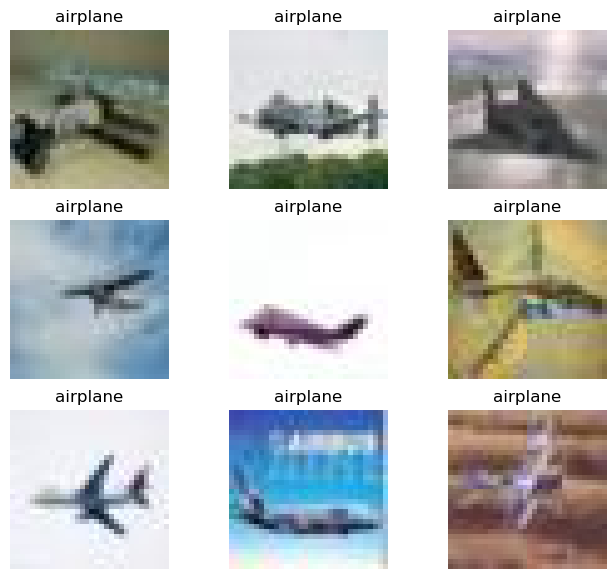

In [338]:
# Display multiple images from the data set
plt.figure(figsize=(8, 7))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    #img =  # TODO: Call display_random_img(target_dir, target_class) right here (Care: pass the right target class!)
    img = display_random_img(testpath, 'airplane')
    plt.axis(False)

**An images representation is nothing else than a array of the pixel values. These values are usually between 0 and 255 and depending on the value the pixel is brighter or darker. By overlaying the 3 color channels red, green, blue (RGB) the colored images we know are created**

Image shape: (32, 32, 3)
[[[175 143 122]
  [169 137 114]
  [168 137 109]
  ...
  [173 133 131]
  [169 129 130]
  [167 126 130]]

 [[144 112  91]
  [137 105  82]
  [140 106  79]
  ...
  [156 117 110]
  [158 119 114]
  [161 121 119]]

 [[123  88  66]
  [114  80  55]
  [120  86  59]
  ...
  [141 104  88]
  [146 108  95]
  [152 114 103]]

 ...

 [[159 126 111]
  [160 127 112]
  [161 125 111]
  ...
  [141  99  85]
  [131  88  72]
  [123  80  64]]

 [[131  97  87]
  [137 103  93]
  [144 107  98]
  ...
  [157 114  97]
  [149 104  85]
  [142  97  78]]

 [[112  79  70]
  [123  89  80]
  [131  97  88]
  ...
  [172 127 108]
  [170 123 103]
  [169 122 102]]]


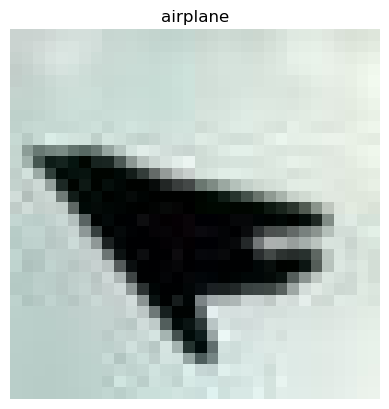

In [339]:
#https://www.geeksforgeeks.org/how-to-convert-images-to-numpy-array/
# TODO: Display image as array
image = display_random_img(testpath, 'airplane')
numpyArrayImage = np.array(img)
print(numpyArrayImage)

**The image shape is (32, 32, 3) this means the width and the height of the image consists of 32 pixels and 3 color channels**

In [340]:
# TODO: Display image shape (Remember, the image datatype should be a Numpy Array -> https://numpy.org/doc/stable/reference/generated/numpy.shape.html)
print(numpyArrayImage.shape)

(32, 32, 3)


---

### Generate dataset out of CIFAR-10 images

Now that we got familiar with our data it is time to create a data set with which we can train our machine learning algorithm.
Since the folder structure is split into train and test we will also only generate a training and test set.

#### Loading data from the file system and generating training and test sets

To load the images from the file system we need to walk through the folders and add the images (normalized) to an array as well as the corresponding labels. Also, for the machine learning algorithms to work with these arrays we need to convert them to numpy arrays

---

#### Task 03 - Load images as features and labels  

##### Finish the function to load the images and their corresponding labels and return them as numpy arrays
* loop through the directory with os.walk https://www.geeksforgeeks.org/os-walk-python/
* create a filepath for each file
* and load each file with mpimg.imread https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html
* normalize each image https://medium.com/analytics-vidhya/a-tip-a-day-python-tip-8-why-should-we-normalize-image-pixel-values-or-divide-by-255-4608ac5cd26a
* do not forget the labels
* return them as a numpy array

In [341]:

def load_images_as_features_and_labels(target_dir, class_name_dictionary):
    """
    returns 
    X -- images as numpy array
    y -- labels as numpy array
    """
    # TODO: Add your code here
    
    X = [] #images
    y = [] #labels
    
    for i in range (0, len(class_name_dictionary)):
        for file in os.listdir(target_dir + class_name_dictionary[i]):
            #data_dir = pathlib.Path("data/CIFAR-10-images/train/")
            filepath = pathlib.Path(target_dir + class_name_dictionary[i] + "/" + file)
            #print(filepath)
            picture = mpimg.imread(filepath) #read picture
            picture = picture / 255#normalize picture
            X.append(picture)
            y.append(class_name_dictionary[i])


    #convert to numpy array
    X = np.asarray(X)
    y = np.asarray(y)
    return X, y 
  
#load_images_as_features_and_labels('data/CIFAR-10-images/train/', class_names_dict)



With help of the function above we can now load the images and there labels as a training and test set (this could take a while, depending on your hardware!)

In [342]:
X_train, y_train = load_images_as_features_and_labels('data/CIFAR-10-images/train/', class_names_dict)
X_test, y_test = load_images_as_features_and_labels('data/CIFAR-10-images/test/', class_names_dict)

X_train, y_train, X_test, y_test

(array([[[[0.78431373, 0.79215686, 0.77254902],
          [0.79215686, 0.8       , 0.78039216],
          [0.79607843, 0.80392157, 0.78431373],
          ...,
          [0.80392157, 0.80784314, 0.78823529],
          [0.79215686, 0.79607843, 0.77647059],
          [0.78823529, 0.79215686, 0.77254902]],
 
         [[0.82352941, 0.83137255, 0.81176471],
          [0.81176471, 0.81960784, 0.8       ],
          [0.81568627, 0.82352941, 0.80392157],
          ...,
          [0.81960784, 0.82352941, 0.80392157],
          [0.81176471, 0.81568627, 0.79607843],
          [0.80784314, 0.81176471, 0.79215686]],
 
         [[0.83137255, 0.83921569, 0.82745098],
          [0.81568627, 0.82352941, 0.81176471],
          [0.83137255, 0.83921569, 0.82745098],
          ...,
          [0.83529412, 0.83921569, 0.81960784],
          [0.82745098, 0.83137255, 0.81176471],
          [0.82352941, 0.82745098, 0.80784314]],
 
         ...,
 
         [[0.85882353, 0.85882353, 0.86666667],
          [0.83529

### Visualizing once again

After loading our data as training and test set it is once again important to visualize the loaded data. This way our understanding of our data grows, and we might notice errors we would not otherwise

First investigate the shape of our training and test set. One of the most common errors in ML is that the input shape for the algorithm is not compatible with the shape of our data

TODO: Print the shape of each data set. It should look like this `((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3), (10000,))`

In [343]:
# TODO: Add your code here
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


---

These shapes tell us the following:
* X_train is a four dimensional array
    - The first dimension tells us how many samples are in the array - 50000
    - The second dimension tells us how many pixel values the image has to represent its height - 32
    - The third dimension tells us how many pixel values the image has to represent its width - 32
    - The fourth dimension tells us how many color channels the image has (red ,green blue - RGB) - 3
* y_train is a one dimensional array containing the corresponding labels to X_train

Next we will visualize the actual images contained in our loaded data

In [344]:
def print_multiple_figures(images_array):
    plt.figure(figsize=(9, 9))
    for idx, img in enumerate(images_array[:100]):
        plt.subplot(10, 10, idx + 1)
        plt.imshow(img, cmap="binary")
        plt.axis("off")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

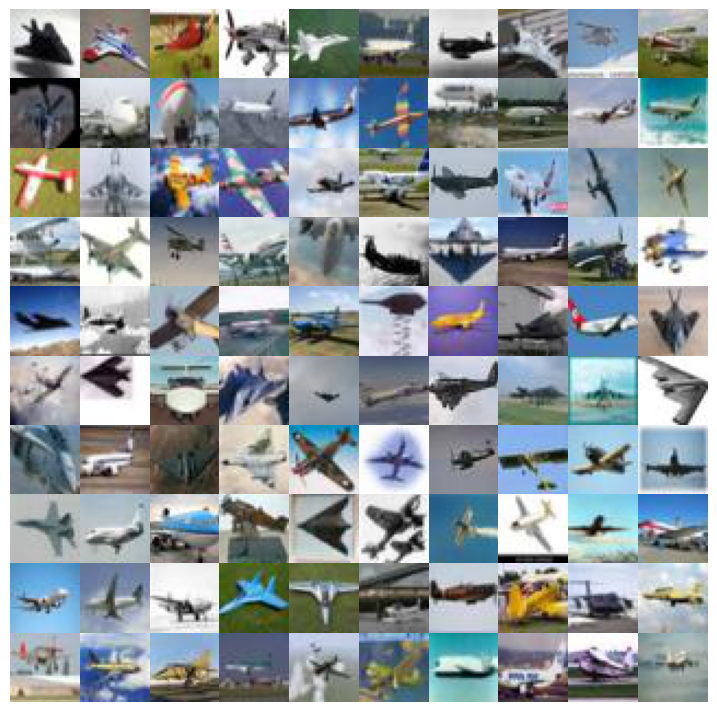

In [345]:
print_multiple_figures(X_train)

**By visualizing the train data we can see that the training set contains the images as we have loaded it. Meaning the data is sorted in order of the walked through folders**

## Training of our machine learning algorithm

We will use the random forest classifier algorithm to try and classify our test images.
For this we first need to once again prepare our data for the algorithm and then fit (train) it on our training data.

**Random forest classifier needs input in shape of (batch, flattened image) i.e (50000, 3072) -> 32*32*3  = 3072. This means we have to reshape or data**

---

#### TASK 04 - Reshaping your data set to make it compatible with the ML algorithm
##### Use numpys shape and reshape functions to reshape the data https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

It should look like this `((50000, 3072), (10000, 3072))`

In [346]:
# Random forest classifier needs input in shape of (batch, flattended image) i.e (50000, 3072) -> 32*32*3  = 3072
# ADD your code here


#X_train_flattened = X_train.flatten() //see also later result..: One shape dimension can be -1. (from numpy docu)
#X_test_flattened = X_test.flatten()
X_train_flattened = np.reshape(X_train, (-1, 3072))
X_test_flattened = np.reshape(X_test, (-1, 3072))

X_train_flattened.shape, X_test_flattened.shape

((50000, 3072), (10000, 3072))

---

After our data has the right shape we can fit/train a RandomForest Classifier on it

---

#### TASK 05 - load and train a RandomForestClassifier
##### use scikit-learns random forest classifier and use your data set to train it https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [72]:
%%time
from sklearn.ensemble import RandomForestClassifier

#https://stackoverflow.com/questions/45554008/error-in-python-script-expected-2d-array-got-1d-array-instead
#updating image flattening...

#number of forests?
#https://www.researchgate.net/publication/230766603_How_Many_Trees_in_a_Random_Forest

# TODO: train the classifier on the data set
rnf_clf = RandomForestClassifier(n_estimators=256) #TODO: load the classifier
rnf_clf.fit(X_train_flattened, y_train)

CPU times: user 6min 5s, sys: 5.4 s, total: 6min 10s
Wall time: 6min 13s


RandomForestClassifier(n_estimators=256)

With the classifier now trained on the training data we can make predictions with it

In [73]:
##https://www.datacamp.com/tutorial/random-forests-classifier-python
y_pred_clf = rnf_clf.predict(X_test_flattened) # TODO: Use the trained classifier to make predictions 


---

### Evaluation of the classifier

It is always important test our classifier. After all how should we know how well it performs?
To measure its performance multiple metrics can be used. The most important being:
* accuracy
* precision
* recall
* f1  

We can calculate it ourselves or import a function from scikit-learn to do it for us.
Now with our predictions and the test data we can evaluate the classifier

---

#### TASK 06 - Evaluate the classifier
##### Use the scikit learns score functions to evaluate accuracy, precision, recall and the f1 score and print the results

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# TODO: Add your code here
print("Accuracy Score:", accuracy_score(y_test, y_pred_clf)) #Accuracy Score: 0.4741 (using 128 forests..)
print("Precision Score:", precision_score(y_test, y_pred_clf, average=None))
print("Recall Score:", recall_score(y_test, y_pred_clf, average=None))
print("f1 score:", f1_score(y_test, y_pred_clf, average=None))


Accuracy Score: 0.4848
Precision Score: [0.56469408 0.53219697 0.40123457 0.38671875 0.41411043 0.43336831
 0.48338608 0.51170213 0.58713886 0.48320413]
Recall Score: [0.563 0.562 0.325 0.297 0.405 0.413 0.611 0.481 0.63  0.561]
f1 score: [0.56384577 0.54669261 0.35911602 0.33597285 0.40950455 0.42293907
 0.53975265 0.49587629 0.60781476 0.51920407]


---

### Viszalization of the evaluation

Another way to evaluate our classifier is by visualizing its performance.  
One way to do that is to use a confusion matrix.  
This matrix tells us how many samples were classified correctly and how many were falsely classified as a different class.
https://en.wikipedia.org/wiki/Confusion_matrix  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

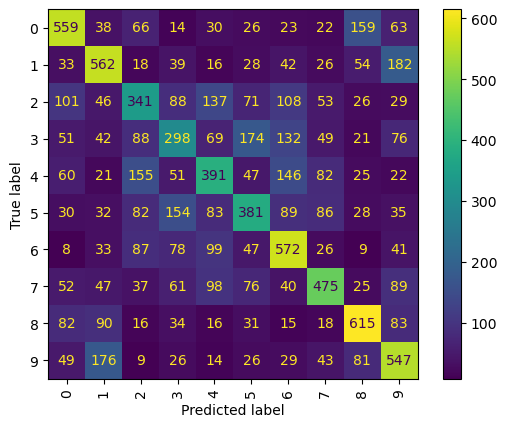

"\nlabels\n{0: 'cat',\n  1: 'dog',\n  2: 'truck',\n  3: 'bird',\n  4: 'airplane',\n  5: 'ship',\n  6: 'frog',\n  7: 'horse',\n  8: 'deer',\n  9: 'automobile'})\n"

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_clf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names_dict.keys())
disp.plot(xticks_rotation='vertical')
plt.show()

"""
labels
{0: 'cat',
  1: 'dog',
  2: 'truck',
  3: 'bird',
  4: 'airplane',
  5: 'ship',
  6: 'frog',
  7: 'horse',
  8: 'deer',
  9: 'automobile'})
"""

--------------------------------------------------------------

## Part 2 - Convolutional Neural Networks

In [347]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.__version__  # IMPORTANT: This should print '2.8.0', if your version is newer, you might not be able to use your GPU for training!

'2.8.0'

If you have installed tensorflow with gpu support you should first of all be able to output your GPU.  
To install tensorflow with GPU support please follow the steps described here:  
https://www.tensorflow.org/install/pip

In [348]:
# Check if we're using a GPU
!nvidia-smi

Sun Feb 26 21:10:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.24       Driver Version: 528.24       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| 46%   30C    P0    N/A /  75W |   3932MiB /  4096MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Next to make sure tensorflow is able to detect your GPU get the device with `tf.config.list_physical_devices('GPU')`.  
And enable mixed precision if your GPU is good enough.
For more information about mixed precision look here:
https://www.tensorflow.org/guide/mixed_precision

In [349]:
from tensorflow.keras import mixed_precision

gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    details = tf.config.experimental.get_device_details(gpu_devices[0])
    print(f"Your GPUs compute capability is {details['compute_capability'][:]}")
    if details['compute_capability'][0] >= 7.0:
        mixed_precision.set_global_policy('mixed_float16')
        print(f"Your global policy has been set to: {mixed_precision.global_policy()}")
    else:
        print(
            f"Your GPU does not support mixed precision, the global policy is left at: {mixed_precision.global_policy()}")
else:
    print("No GPU device could be found on your machine")
    


Your GPUs compute capability is (6, 1)
Your GPU does not support mixed precision, the global policy is left at: <Policy "float32">


### Load images from directory with image_dataset_from_directory & create augmentation layer

This step describes how data can be loaded and how a CNN model can be trained.  
For more information and examples look here:  
https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory  
https://www.tensorflow.org/api_docs/python/tf/data/Dataset  
https://www.tensorflow.org/tutorials/load_data/images  
https://www.tensorflow.org/tutorials/images/data_augmentation  
https://www.tensorflow.org/guide/keras/preprocessing_layers

---

#### TASK 07 - Load your datasets for training and testing the DL model
##### Use the Tensorflow 'image_dataset_from_directory' method! (use shuffle = True on train_data!)

In [350]:
train_dir = "data/CIFAR-10-images/train/"
test_dir = "data/CIFAR-10-images/test/"

BATCH_SIZE = 64

#train_data =  # TODO load the training set
#test_data =  # TODO load the testing set


#isssue during loading (loaded image default with 256.. https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory)
#https://stackoverflow.com/questions/61742556/valueerror-shapes-none-1-and-none-2-are-incompatible none1/none10
train_data = tf.keras.utils.image_dataset_from_directory(train_dir, batch_size = BATCH_SIZE, image_size=(32,32), label_mode='categorical',  shuffle=True)
test_data = tf.keras.utils.image_dataset_from_directory(test_dir, batch_size = BATCH_SIZE, image_size=(32,32),label_mode='categorical')

Found 50000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


---

In [351]:
# save the amount of classes we have - should be 10
num_classes = len(train_data.class_names)
print(num_classes)
print(len(test_data.class_names))

10
10


### CNN Architecture

* Sequential API - https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
* Functional API - https://www.tensorflow.org/guide/keras/functional
* Subclassing - https://www.tensorflow.org/guide/keras/custom_layers_and_models


To use data augmentation inside our CNN model we first need to create a data augmentation "layer".  
For this we use the Sequential API and stack different preprocessing layers.  
The different layers and their options can be found in the documentation:  
https://www.tensorflow.org/guide/keras/preprocessing_layers

---

#### Task 08 - Build a sequential model with preprocessing layers
##### Use keras sequential API ( https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to stack preprocessing layers. Do not forget to normalize/rescale your data!

In [352]:
# create a sequential model which will be added as a layer in the model
from tensorflow.keras.layers.experimental import preprocessing

#data_augmentation =  #TODO: Build your sequential model here
#using: https://www.tensorflow.org/tutorials/keras/classification
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Rescaling(scale=1./255),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomFlip(mode='horizontal_and_vertical'),]
)




---

Next we build our CNN model, this time with help of the functional API.  
It is the same model as before, but with addition of our `data_augmentation` layer

---

#### Task 09 - Build a model with the functional API 
Use keras functional API (https://www.tensorflow.org/guide/keras/functional) to build your CNN do not forget to include your data_augmentation layer
You can use layers like: 
* Conv2D, 
* Dense,
* BatchNormalization, 
* MaxPooling,
* Dropout,
* Flatten (for input into Dense)
* ....

<p><strong style="color:red">Attention: </strong>Experiment with different 
layers and number of layers until you reach at least 70% accuracy</p>

In [399]:
#https://debuggercafe.com/faster-image-augmentation-in-tensorflow-using-keras-layers/
# build model with functional api

inputs = tf.keras.layers.Input(shape=(32, 32, 3), name='input_layer')

#x =   # TODO: add your augmentation layer/model after the input layer
#TODO: add your layers
x = data_augmentation(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
 
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
 
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
 
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.2)(x)
 
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
 


"""
Loss: 0.7093535661697388
Accuracy: 0.7132999897003174
Recall: 0.8090053200721741
Precision: 0.7595999836921692
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),input_shape=(32, 32, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),input_shape=(32, 32, 3))(x)
x = tf.keras.activations.relu(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3),input_shape=(32, 32, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),input_shape=(32, 32, 3))(x)
x = tf.keras.activations.relu(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3),input_shape=(32, 32, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),input_shape=(32, 32, 3))(x)
x = tf.keras.activations.relu(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3),input_shape=(32, 32, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),input_shape=(32, 32, 3))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.BatchNormalization()(x)
"""

outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)                        
                           
#model = keras.Model()  # TODO: use keras.Model() to build your model
#https://www.tensorflow.org/api_docs/python/tf/keras/Model
model = tf.keras.Model(inputs = inputs, outputs = outputs)  

---

In [400]:
model.summary()

Model: "model_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 sequential_25 (Sequential)  (None, 32, 32, 3)         0         
                                                                 
 batch_normalization_82 (Bat  (None, 32, 32, 3)        12        
 chNormalization)                                                
                                                                 
 conv2d_120 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_83 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_118 (MaxPooli  (None, 16, 16, 32)       0  

The next steps of compiling, training and evaluating the model are the same as before.  

To train our model we first need to compile it. In this step the most important arguments are the: 
* loss function - https://www.tensorflow.org/api_docs/python/tf/keras/losses
* optimizer - https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

---

#### Task 10 - Compile and train your model
##### use the compile and fit methods respectively to compile and fit/train your model

For compiling use:
* CategoricalCrossentropy as a loss function
* Adam as a optimizer
* and track at least accuracy, Recall, and Precision during training

For fitting use:
* your training data set
* your test data set for validation during training
* Experiment with the number of epochs to avoid overfitting or underfitting your data (https://www.ibm.com/cloud/learn/overfitting)

In [401]:
# TODO: compile your model here
#shapes none,10 and none,1 are incompatible: https://stackoverflow.com/questions/61742556/valueerror-shapes-none-1-and-none-2-are-incompatible?..
model.compile(optimizer="Adam", 
              loss="categorical_crossentropy", 
              metrics=["Recall", 
                       "Precision", 
                       "accuracy"])

In [ ]:
#https://www.tensorflow.org/tutorials/images/classification
history =  model.fit(train_data, validation_data=test_data, epochs=50)# TODO: fit your model here

Epoch 1/50
782/782 [==============================] - 26s 30ms/step - loss: 1.7287 - recall: 0.1875 - precision: 0.5651 - accuracy: 0.3948 - val_loss: 1.5073 - val_recall: 0.2954 - val_precision: 0.6045 - val_accuracy: 0.4603
Epoch 2/50
782/782 [==============================] - 22s 28ms/step - loss: 1.4450 - recall: 0.2855 - precision: 0.6564 - accuracy: 0.4781 - val_loss: 1.2895 - val_recall: 0.3975 - val_precision: 0.6757 - val_accuracy: 0.5338
Epoch 3/50
782/782 [==============================] - 22s 28ms/step - loss: 1.3247 - recall: 0.3514 - precision: 0.6883 - accuracy: 0.5253 - val_loss: 1.4055 - val_recall: 0.4048 - val_precision: 0.6266 - val_accuracy: 0.5154
Epoch 4/50
782/782 [==============================] - 22s 28ms/step - loss: 1.2464 - recall: 0.3958 - precision: 0.7152 - accuracy: 0.5571 - val_loss: 1.2056 - val_recall: 0.4498 - val_precision: 0.7313 - val_accuracy: 0.5888
Epoch 5/50
782/782 [==============================] - 23s 29ms/step - loss: 1.1836 - recall: 0.4

In [ ]:
#data augmentation
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 
train_generator = data_generator.flow(test_data, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
 
history = model.fit(train_generator, validation_data=test_data,
              steps_per_epoch=steps_per_epoch, epochs=50)

---

### Evaluate the model

After training we can evaluate our models performance on the test data.  
for this we can use the `evaluate` method.  
This will evaluate the model on the metrics we decided to track during training (loss is always tracked).

In [386]:
loss, accuracy, recall, precision = model.evaluate(test_data)
print("Loss:", loss)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)


#print(range(len(history.history['loss']))) ##mhh diagram empty?...

157/157 [==============================] - 3s 18ms/step - loss: 0.7094 - recall: 0.7133 - precision: 0.8090 - accuracy: 0.7596
Loss: 0.7093535661697388
Accuracy: 0.7132999897003174
Recall: 0.8090053200721741
Precision: 0.7595999836921692


Another important step in evaluating our model is to visualize how the various metrics  behaved during training.  
This way unusual patterns like overfitting and underfitting can be discovered.  
To plot these curves the history object which is created during training can be used.  

In [387]:
# Plot the validation and training data separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    recall = history.history['recall']
    val_recall = history.history['val_recall']

    precision = history.history['precision']
    val_precision = history.history['val_precision']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

    # Plot recall
    plt.figure()
    plt.plot(epochs, recall, label='training_recall')
    plt.plot(epochs, val_recall, label='val_recall')
    plt.title('Recall')
    plt.xlabel('Epochs')
    plt.legend();

    # Plot precision
    plt.figure()
    plt.plot(epochs, precision, label='training_precision')
    plt.plot(epochs, val_precision, label='val_precision')
    plt.title('Precision')
    plt.xlabel('Epochs')
    plt.legend();

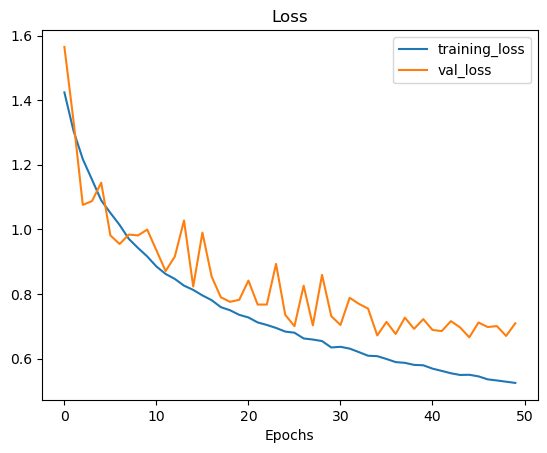

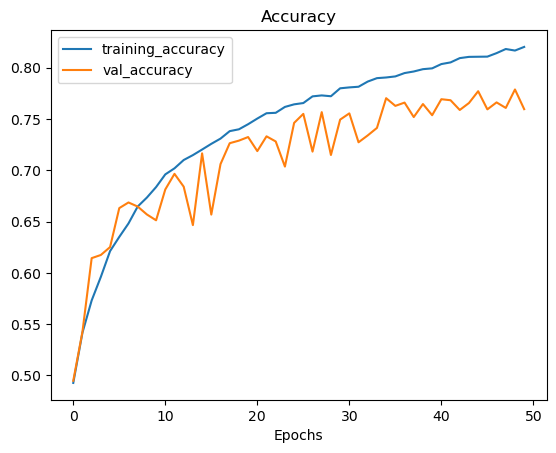

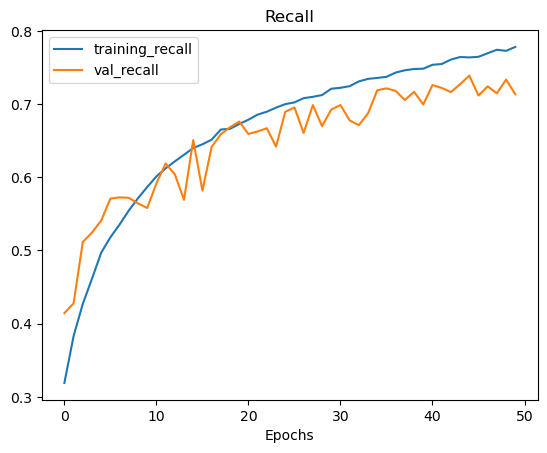

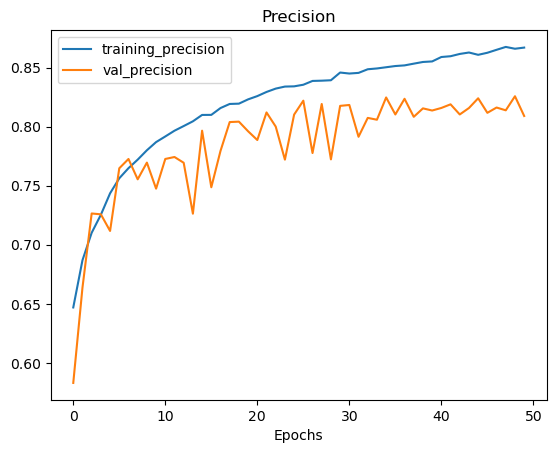

In [388]:
# Check out the loss curves
plot_loss_curves(history)

In [389]:
y_pred = model.predict(test_data)

In [374]:
y_test = np.concatenate([y for x, y in test_data], axis=0)
y_test.argmax(axis=1)


array([7, 1, 0, ..., 7, 2, 9], dtype=int64)

In [390]:
y_pred.argmax(axis=1).shape

(10000,)

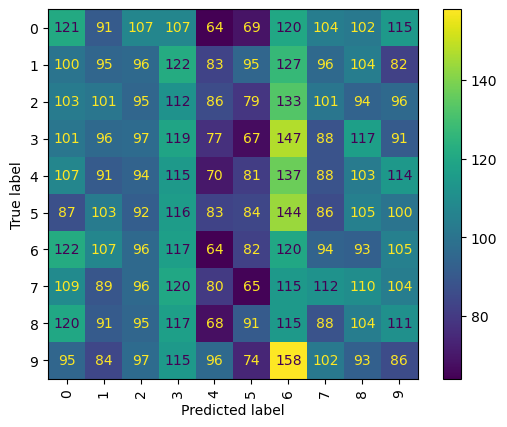

"\nlabels\n{0: 'cat',\n  1: 'dog',\n  2: 'truck',\n  3: 'bird',\n  4: 'airplane',\n  5: 'ship',\n  6: 'frog',\n  7: 'horse',\n  8: 'deer',\n  9: 'automobile'})\n"

In [391]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names_dict.keys())
disp.plot(xticks_rotation='vertical')
plt.show()

"""
labels
{0: 'cat',
  1: 'dog',
  2: 'truck',
  3: 'bird',
  4: 'airplane',
  5: 'ship',
  6: 'frog',
  7: 'horse',
  8: 'deer',
  9: 'automobile'})
"""

## Save the model for later use (i.e. deploying it to production, making predictions, grad-cam, etc)

After we have trained a model we can easily save it with `model.save()`

In [363]:
model.save('saved_models/model_with_data_augmentation_layer')

INFO:tensorflow:Assets written to: saved_models/model_with_data_augmentation_layer\assets


In [ ]:
# and we can load it easily with the load_model method
loaded_model = tf.keras.models.load_model('saved_models/model_with_data_augmentation_layer/')

## Good Luck (or well done!)

If you just read through everything, good luck with this lab! Otherwise, well done and please send it to your instructor.